<a href="https://colab.research.google.com/github/adithya70/Coursera-ML/blob/master/Copy_of_vgg19realfake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow.keras.optimizers import Adam



import matplotlib
#matplotlib.use("Agg")

# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
#from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import os
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from tqdm.notebook import tqdm_notebook as tqdm

import os

In [6]:

real = "/content/drive/MyDrive/Celebrity Dataset/Original"
fake = "/content/drive/MyDrive/Celebrity Dataset/adversarials"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [9]:
from skimage.transform import resize

X=[]
Y=[]
for img in os.listdir(real):

    d=plt.imread(os.path.join(real,img))
    d1 = resize(d, (400, 400))
  
    X.append(d1)
    Y.append(0)
real_array = np.stack(X, axis=0)    
    
X1=[]
Y1=[]
for img in os.listdir(fake):
    f=plt.imread(os.path.join(fake,img))
    f1 = resize(f, (400, 400))

   
    X1.append(f1)
    Y1.append(1)    
fake_array=np.stack(X1, axis=0)    

In [10]:
X=np.array([])
X1=np.array([])
Y=np.array([])
Y1=np.array([])
# real_labels=np.array([])
# fake_labels=np.array([])

In [11]:
print(real_array.shape,fake_array.shape)
real_labels=np.zeros((2560,), dtype=int)
fake_labels=np.ones((2406,), dtype=int)

(2560, 400, 400, 3) (2406, 400, 400, 3)


In [12]:
X=np.concatenate((fake_array,real_array),axis=0)
Y=np.concatenate((fake_labels,real_labels),axis=0)

In [13]:
X.shape,Y.shape

((4966, 400, 400, 3), (4966,))

In [14]:
real_array=np.array([])
fake_array=np.array([])
real_labels=np.array([])
fake_labels=np.array([])

In [10]:
X.shape

(4966, 450, 450, 3)

In [11]:
Y.shape

(4966,)

In [15]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, stratify=Y)

In [ ]:
plt.imshow(X[-1])

In [33]:
y_train.shape

(3972,)

In [16]:
X=np.array([])
Y=np.array([])

In [17]:
from tensorflow.keras.applications.vgg19 import VGG19

from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense

In [18]:
baseModel = VGG19(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(400, 400, 3)))

for layer in baseModel.layers:
	layer.trainable = False


headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu" ,kernel_initializer='he_uniform')(headModel)

headModel = Dense(1, activation="sigmoid")(headModel)


model = Model(inputs=baseModel.input, outputs=headModel)

80150528/80134624 [==============================] - 1s 0us/step


In [19]:
print("[INFO] compiling model...")
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
#opt = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
print("[INFO] training head...")
H = model.fit(
	 x_train,y_train,batch_size=32,
                steps_per_epoch=3972//32,
                epochs=15,
                
                validation_data=(x_test,y_test),
                validation_steps=994//32)

[INFO] compiling model...
[INFO] training head...
Epoch 1/15
124/124 [==============================] - 44s 240ms/step - loss: 4.5181 - accuracy: 0.8405 - val_loss: 0.1917 - val_accuracy: 0.9486
Epoch 2/15
124/124 [==============================] - 29s 230ms/step - loss: 0.0584 - accuracy: 0.9779 - val_loss: 0.1118 - val_accuracy: 0.9677
Epoch 3/15
124/124 [==============================] - 28s 230ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0426 - val_accuracy: 0.9819
Epoch 4/15
124/124 [==============================] - 28s 230ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0643 - val_accuracy: 0.9798
Epoch 5/15
124/124 [==============================] - 28s 229ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0337 - val_accuracy: 0.9879
Epoch 6/15
124/124 [==============================] - 28s 230ms/step - loss: 7.3853e-04 - accuracy: 1.0000 - val_loss: 0.0387 - val_accuracy: 0.9839
Epoch 7/15
124/124 [==============================] - 28s 229ms/step - loss:

In [20]:
acc =H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']

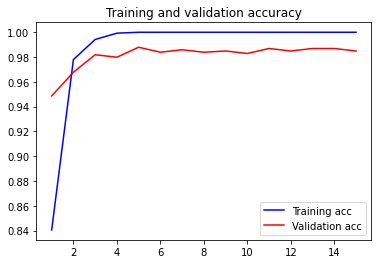

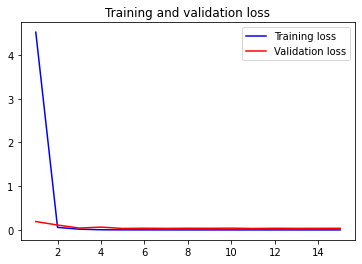

In [21]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
model.save('best_vgg19_realfake_model.h5')

In [25]:
model.save_weights('best_vgg19_realfake_model_Weights')

In [24]:
!zip -r ./best_vgg19_realfake_model.zip ./best_vgg19_realfake_model/

  adding: best_vgg19_realfake_model/ (stored 0%)
  adding: best_vgg19_realfake_model/variables/ (stored 0%)
  adding: best_vgg19_realfake_model/variables/variables.data-00000-of-00001 (deflated 30%)
  adding: best_vgg19_realfake_model/variables/variables.index (deflated 69%)
  adding: best_vgg19_realfake_model/keras_metadata.pb (deflated 95%)
  adding: best_vgg19_realfake_model/saved_model.pb (deflated 91%)
  adding: best_vgg19_realfake_model/assets/ (stored 0%)


In [26]:
np.save('my_history.npy',H.history)